In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = pd.read_csv('/content/Advertising.csv')

In [ ]:
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [ ]:
data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

For Multivariable just change shape of X

In [ ]:
X = data.iloc[:,1:2].values
y = data.iloc[:,4].values 

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()



In [ ]:
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

In [ ]:
print("Accuracy on the training data: {}".format(reg.score(X_train,y_train)))
print("Accuracy on the test data: {}".format(reg.score(X_test,y_test)))

Accuracy on the training data: 0.590700527532505
Accuracy on the test data: 0.6606120390330492


In [ ]:
print(reg.coef_)
# slope

[0.04689446]


In [ ]:
print(reg.intercept_)
# intercept

7.131784506685331


In [ ]:
y1 = reg.intercept_ + reg.coef_*100
y1

array([11.82123008])

In [ ]:
y_list = []
for i in range(100):
  y1 = reg.intercept_ + reg.coef_*i
  y_list.append(y1)
  

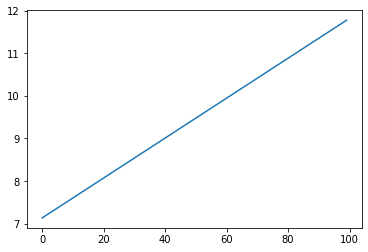

In [ ]:
plt.plot(y_list)

In [ ]:
# Cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(reg,X_train,y_train,scoring='r2',cv=10)
mean_r2 = np.mean(scores)
round(mean_r2,2)

0.48

Text(0, 0.5, 'Sales')

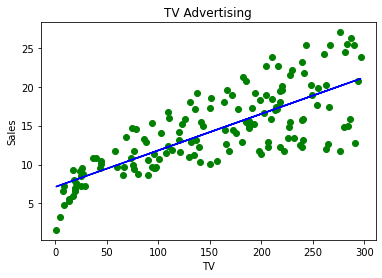

In [ ]:
plt.scatter(X_train,y_train,color='green')
plt.plot(X_train,reg.predict(X_train),color='blue')
plt.title('TV Advertising')
plt.xlabel('TV')
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

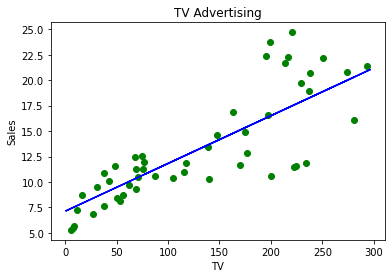

In [ ]:
plt.scatter(X_test,y_test,color='green')
plt.plot(X_train,reg.predict(X_train),color='blue')
plt.title('TV Advertising')
plt.xlabel('TV')
plt.ylabel('Sales')